<a href="https://colab.research.google.com/github/jubayer1608015/labtask/blob/main/1608015_labtask03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course No: ETE 456

Name: Khondokar Jubayer Rahman

ID: 1608015

Lab task_03: Introduction to Deep Neural Network (DNN)

Objective:

1.Classification problems using Deep Neural Network.

2.Develop DNN models using Tensorflow Framework

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
# Download the data
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-21 08:12:54--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-21 08:12:54--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccb146392b97abcf72c92c9aacc.dl.dropboxusercontent.com/cd/0/inline/BcRfi-9iuXeZzi8NAAYHXFGnXLPd1p22qxo1z9FreqorK5e2A5-UKwpRUKEYHI3hLKocNYFkXQ_6zUGNb-tVz7Hlve9Z7hmgY7rVX0Xm5pij8CkZE2ZqNuzxZ7KUgYyQQogbdfYCM55Edl1M5PmhNe-B/file# [following]
--2021-12-21 08:12:54--  https://uccb146392b97abcf72c92c9aacc.dl.dropboxusercontent.com/cd/0/inline/BcRfi-9iuXeZzi8NAAYHXFGnXLPd1p22qxo1z9FreqorK5e2A5-UKwpRUKEYHI3hLKocNYFkXQ_6zUGNb-tVz

In [39]:
"""importing the dataset """

dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
feature = dataset[[	'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [41]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [44]:
feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]= imputer.transform(feature)

In [45]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [46]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['Outcome']])

In [47]:
target[['Outcome']]= imputer.transform(target[['Outcome']])

In [48]:
target

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [49]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [50]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [51]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,4.0,142.0,86.0,0.0,0.0,44.0,0.645,22.0
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


In [52]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
#built the neural network architecture
model = Sequential()
model.add(Dense(80, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                720       
                                                                 
 dense_4 (Dense)             (None, 12)                972       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,705
Trainable params: 1,705
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 0.6834 - accuracy: 0.5418 - val_loss: 0.6416 - val_accuracy: 0.7398
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6321 - accuracy: 0.7169 - val_loss: 0.5934 - val_accuracy: 0.7561
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5874 - accuracy: 0.7515 - val_loss: 0.5500 - val_accuracy: 0.7724
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5458 - accuracy: 0.7556 - val_loss: 0.5188 - val_accuracy: 0.7805
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5160 - accuracy: 0.7658 - val_loss: 0.4959 - val_accuracy: 0.7805
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.7760 - val_loss: 0.4830 - val_accuracy: 0.7886
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4788 - accuracy: 0.7780 - val_loss: 0.4793 - val_accuracy: 0.7724
Epoch 8/20
16/16 [

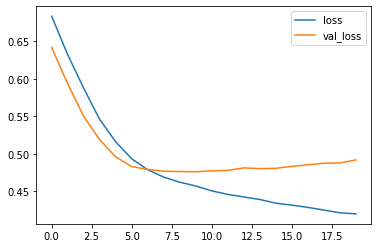

In [58]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

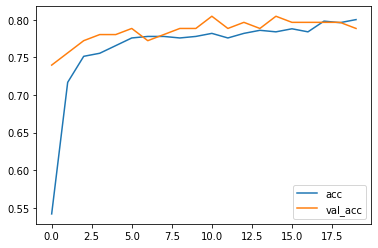

In [59]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [60]:
#Prediction
y_pred = model.predict(X_test)

In [61]:
y_test

,Outcome
661,1.0
122,0.0
113,0.0
14,1.0
529,0.0
...,...
476,1.0
482,0.0
230,1.0
527,0.0


In [62]:
y_pred

array([[9.47742343e-01],
       [9.37063396e-02],
       [8.47529769e-02],
       [7.37732351e-01],
       [9.54809785e-02],
       [1.96350217e-02],
       [8.74638140e-01],
       [8.53964806e-01],
       [2.60421932e-01],
       [4.22482073e-01],
       [6.50441825e-01],
       [9.25458550e-01],
       [2.33366817e-01],
       [8.61124396e-02],
       [1.98713541e-01],
       [1.82709068e-01],
       [9.09108877e-01],
       [1.08250976e-02],
       [2.99204230e-01],
       [2.76752830e-01],
       [7.06833601e-01],
       [4.22109127e-01],
       [1.91726565e-01],
       [1.62691891e-01],
       [1.45051181e-02],
       [4.20142353e-01],
       [1.69546008e-02],
       [9.51642513e-01],
       [5.55943847e-02],
       [1.05129927e-01],
       [5.85148156e-01],
       [1.82301521e-01],
       [6.69363439e-02],
       [5.55902898e-01],
       [4.38239276e-02],
       [7.92475939e-01],
       [4.53306973e-01],
       [2.70212889e-02],
       [3.62296879e-01],
       [8.60138178e-01],


In [63]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [64]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [65]:
import pandas as pd
from sklearn.metrics import classification_report
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       107
         1.0       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



In this experiment diabetes dataset are used in deep neural network.As a framework tensorflow is used.In the first section of the experiment data preprossesing is used to taking care of missing data.Data spliting technique is used to split the train and test data set in order to train the CNN model train dataset used and test the model test dataset is used.The model has three dense layer of 60,12,1 neurons repectively.As a activation function relu and sigmoid are used and adam optimizer are used to optimize the model.After excuting ten epochs i get the trainng accuracy 80% and validation accuracy with 78%.